In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plant-pathology-2020-fgvc7/sample_submission.csv
/kaggle/input/plant-pathology-2020-fgvc7/train.csv
/kaggle/input/plant-pathology-2020-fgvc7/test.csv
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1743.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_262.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1524.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1336.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1461.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1797.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1499.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1170.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1259.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_422.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_636.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1395.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1800.jpg
/kaggle/input/plant-patholog

In [2]:
data_path = '../input/plant-pathology-2020-fgvc7/'
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [3]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [4]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [5]:
submission.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.25,0.25,0.25,0.25
1,Test_1,0.25,0.25,0.25,0.25
2,Test_2,0.25,0.25,0.25,0.25
3,Test_3,0.25,0.25,0.25,0.25
4,Test_4,0.25,0.25,0.25,0.25


In [6]:
healthy = train.loc[train['healthy'] == 1]
multiple_diseases = train.loc[train['multiple_diseases'] == 1]
rust = train.loc[train['rust'] == 1]
scab = train.loc[train['scab'] == 1]

([<matplotlib.patches.Wedge at 0x7f2e14621150>,
 [Text(0.6921787180836257, 0.8549202431993926, 'healthy'),
  Text(-0.3942932497177081, 1.0269044908008969, 'multiple_diseases'),
  Text(-1.0996317038245758, -0.028462535794632142, 'rust'),
  Text(0.5744651016901711, -0.9380777403499678, 'scab')],
 [Text(0.377552028045614, 0.4663201326542141, '28.3%'),
  Text(-0.21506904530056806, 0.5601297222550347, '5.0%'),
  Text(-0.5997991111770412, -0.015525019524344801, '34.2%'),
  Text(0.31334460092191146, -0.5116787674636187, '32.5%')])

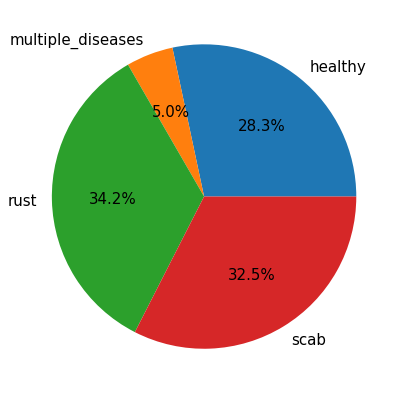

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=15)
plt.figure(figsize=(7, 7))

label = ['healthy', 'multiple_diseases', 'rust', 'scab']

plt.pie([len(healthy), len(multiple_diseases), len(rust), len(scab)], labels=label, autopct='%.1f%%')

In [8]:
import matplotlib.gridspec as gridspec
import cv2

def show_image(img_ids, rows=2, cols=3) :
    assert len(img_ids) <= rows*cols
    
    plt.figure(figsize=(15, 8))
    grid = gridspec.GridSpec(rows, cols)
    
    for idx, img_id in enumerate(img_ids) :
        img_path = f'{data_path}/images/{img_id}.jpg'
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax = plt.subplot(grid[idx])
        ax.imshow(image)

In [9]:
num_of_imgs = 6
last_healthy_img_ids = healthy['image_id'][-num_of_imgs:]
last_multiple_diseases_img_ids = multiple_diseases['image_id'][-num_of_imgs:]
last_rust_img_ids = rust['image_id'][-num_of_imgs:]
last_scab_img_ids = scab['image_id'][-num_of_imgs:]

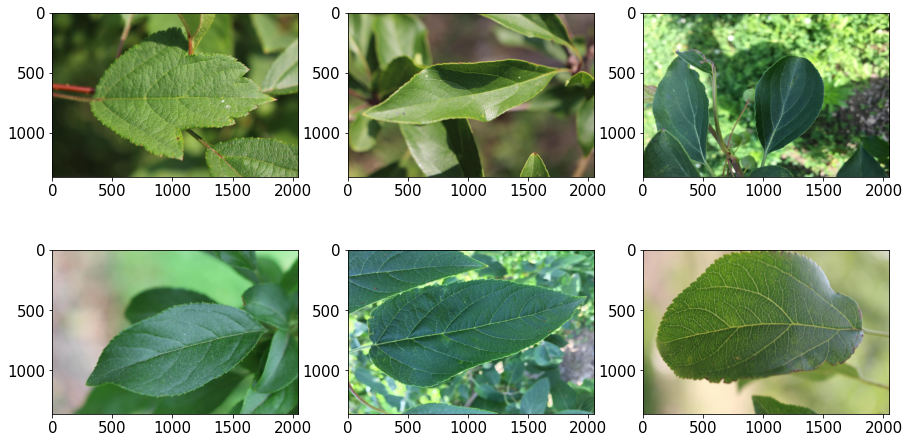

In [10]:
show_image(last_healthy_img_ids)

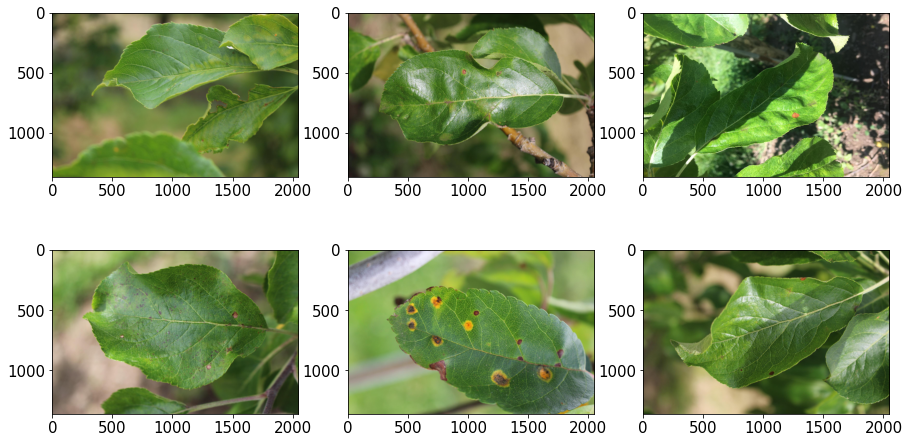

In [11]:
show_image(last_multiple_diseases_img_ids)

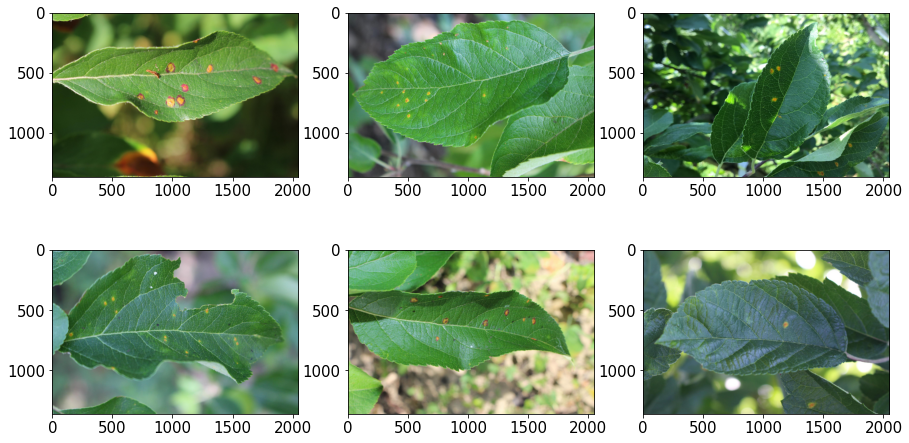

In [12]:
show_image(last_rust_img_ids)

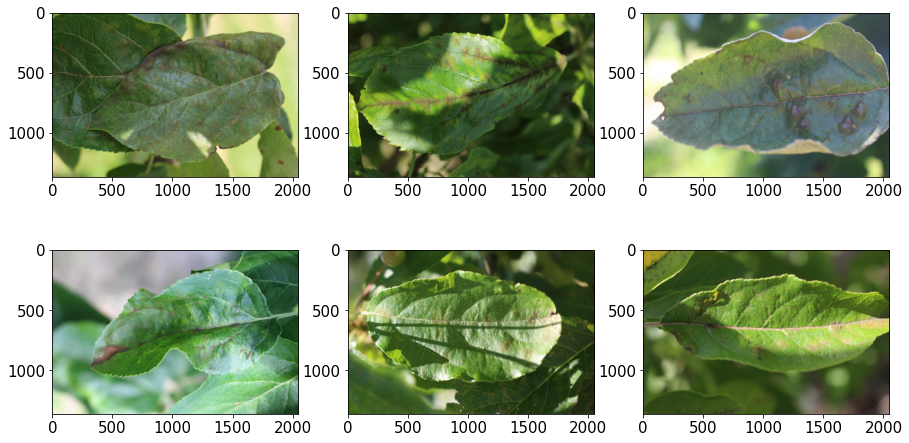

In [13]:
show_image(last_scab_img_ids)

In [14]:
import torch
import random
import numpy as np
import os

seed = 50
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.enabled = False

In [15]:
if torch.cuda.is_available() :
    device = torch.device('cuda')
else :
    device = torch.device('cpu')

In [16]:
device

device(type='cuda')

In [17]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(train, test_size=0.1, stratify=train[['healthy', 'multiple_diseases', 'rust', 'scab']], random_state=50)

In [18]:
import cv2 
from torch.utils.data import Dataset
import numpy as np

class ImageDataset(Dataset) :
    def __init__(self, df, img_dir='./', transform=None, is_test=False) :
        super().__init__()
        self.df = df
        self.img_dir = img_dir
        self.transform = transform
        self.is_test = is_test
        
    def __len__(self) :
        return len(self.df)
    
    def __getitem__(self, idx) :
        img_id = self.df.iloc[idx, 0]
        img_path = self.img_dir + img_id + '.jpg'
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform is not None :
            image = self.transform(image=image)['image']
        if self.is_test :
            return image
        else :
            label = np.argmax(self.df.iloc[idx, 1:5])
            return image, label

In [19]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [20]:
transform_train = A.Compose([
    A.Resize(450, 650),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.3),
    A.VerticalFlip(p=0.2),
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=30, p=0.3),
    A.OneOf([A.Emboss(p=1), A.Sharpen(p=1), A.Blur(p=1)], p=0.3),
    A.PiecewiseAffine(p=0.3),
    A.Normalize(),
    ToTensorV2()
])

In [21]:
transform_test = A.Compose([
    A.Resize(450, 650),
    A.Normalize(),
    ToTensorV2()
])

In [22]:
img_dir = '/kaggle/input/plant-pathology-2020-fgvc7/images/'

dataset_train = ImageDataset(train, img_dir=img_dir, transform=transform_train)
dataset_valid = ImageDataset(valid, img_dir=img_dir, transform=transform_test)

In [23]:
def seed_worker(worker_id) :
    worker_seed = torch.initial_seed() % 2 ** 32
    np.random.seed(worker_seed)
    random.seed(worker_seed)
    
g = torch.Generator()
g.manual_seed(0)

In [24]:
from torch.utils.data import DataLoader

batch_size = 4

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, worker_init_fn=seed_worker, generator=g, num_workers=2)
loader_valid = DataLoader(dataset_valid, batch_size=batch_size, shuffle=False, worker_init_fn=seed_worker, generator=g, num_workers=2)

In [25]:
!pip install efficientnet-pytorch==0.7.1

  Preparing metadata (setup.py) ... - done
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=0a6c3b97e607196945cc177f7d004467737de27eae5001327f03daf05b5ffe20
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch


In [26]:
from efficientnet_pytorch import EfficientNet

In [27]:
model = EfficientNet.from_pretrained('efficientnet-b7', num_classes=4)
model = model.to(device)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b7-dcc49843.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b7-dcc49843.pth


  0%|          | 0.00/254M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b7


In [28]:
import torch.nn as nn

criterion = nn.CrossEntropyLoss()

In [29]:
from transformers import get_cosine_schedule_with_warmup

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=len(loader_train)*3, num_training_steps=len(loader_train)*epochs)

NameError: name 'optimizer' is not defined

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=0.00006, weight_decay=0.0001)

In [ ]:
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm
epochs = 5

for epoch in range(epochs) :
    model.train()
    epoch_train_loss = 0
    
    for images, labels in tqdm(loader_train) : 
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        epoch_train_loss += loss.item()
        loss.backward()
        optimizer.step()
        scheduler.step()
        
    print(f'에폭 [{epoch+1}/{epochs}] - 훈련 데이터 손실값 : {epoch_train_loss/len(loader_train) : .4f}')
    
    model.eval()
    epoch_valid_loss = 0
    preds_list = []
    true_onehot_list = []
    
    with torch.no_grad() :
        for images, labels in loader_valid :
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            epoch_valid_loss += loss.item()
            
            preds = torch.softmax(outputs.cpu(), dim=1).numpy()
            true_onehot = torch.eye(4)[labels].cpu().numpy()
            
            preds_list.extend(preds)
            true_onehot_list.extend(true_onehot)
    print(f'에폭 [{epoch+1}/{epochs}] - 검증 데이터 손실값 : {epoch_valid_loss/len(loader_valid) : .4f} / 검증 데이터 ROC_AUC : {roc_auc_score(true_onehot_list, preds_list) :.4f}')
        
        

In [ ]:
dataset_test = ImageDataset(test, img_dir=img_dir, transform=transform_test, is_test=True)
loader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, worker_init_fn=seed_worker, generator=g, num_workers=2)

In [ ]:
dataset_TTA = ImageDataset(test, img_dir=img_dir, transform=transform_train, is_test=True)
loader_TTA = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, worker_init_fn=seed_worker, generator=g, num_workers=2)

In [ ]:
model.eval()

preds = np.zeros((len(test), 4))

with torch.no_grad() :
    for i, images in enumerate(loader_test) :
        images = images.to(device)
        outputs = model(images)
        
        preds_part = torch.softmax(outputs.cpu(), dim=1).squeeze().numpy()
        preds[i*batch_size:(i+1)*batch_size] += preds_part

In [ ]:
submission[['healthy', 'multiple_diseases', 'rust', 'scab']] = preds
submission.to_csv('submission.csv', index=False)

In [ ]:
model.eval()

num_TTA = 5

preds_tta = np.zeros((len(test), 4))

for i in range(num_TTA) :
    with torch.no_grad() :
        for i, images in enumerate(loader_TTA) :
            images = images.to(device)
            outputs = model(images)

            preds_part = torch.softmax(outputs.cpu(), dim=1).squeeze().numpy()
            preds_tta[i*batch_size:(i+1)*batch_size] += preds_part
            
preds_tta /= num_TTA

In [ ]:
submission_tta = submission.copy()
submission_tta[['healthy', 'multiple_diseases', 'rust', 'scab']] = preds
submission_tta.to_csv('submission_tta.csv', index=False)

In [ ]:
def apply_label_smoothing(df, target, alpha, threshold) :
    df_target = df[target].copy()
    k = len(target)
    
    for idx, row in df_target.iterrows() :
        if (row > threshold).any():
            row = (1 - alpha)*row + alpha/k
            df_target.iloc[idx] = row
    return df_target

In [ ]:
alpha = 0.001
threshold = 0.999

submission_test_ls = submission.copy()
submission_tta_ls = submission_tta.copy()
target = ['healthy', 'multiple_diseases', 'rust', 'scab']

submission_test_ls[target] = apply_label_smoothing(submission_test_ls, target, alpha, threshold)
submission_tta_ls[target] = apply_label_smoothing(submission_tta_ls, target, alpha, threshold)

submission_test_ls.to_csv('submission_test_ls.csv', index=False)
submission_tta_ls.to_csv('submission_tta_ls.csv', index=False)
